In [842]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [843]:
df=pd.read_csv('diabetes.csv')

In [844]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [845]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [846]:
Bp_mean=df[df['BloodPressure']!=0]['BloodPressure'].mean()


In [847]:
df[df['BloodPressure']==0]['BloodPressure']=Bp_mean

In [848]:
for i in  df.columns:	
    if i!='Pregnancies' and i!='Outcome':
         df[i]=df[i].replace(0,df[df[i]!=0][i].mean())

In [849]:
stats.mode(df['Outcome'],keepdims=False)

ModeResult(mode=0, count=500)

In [850]:
df[(df['Outcome']!=0) & (df['Outcome']!=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [851]:
df[(df['Outcome']!=0) & (df['Outcome']!=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [852]:
df.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1
767,1,93.0,70.0,31.00000,155.548223,30.4,0.315,23,0


In [853]:

# outlyers

<AxesSubplot: >

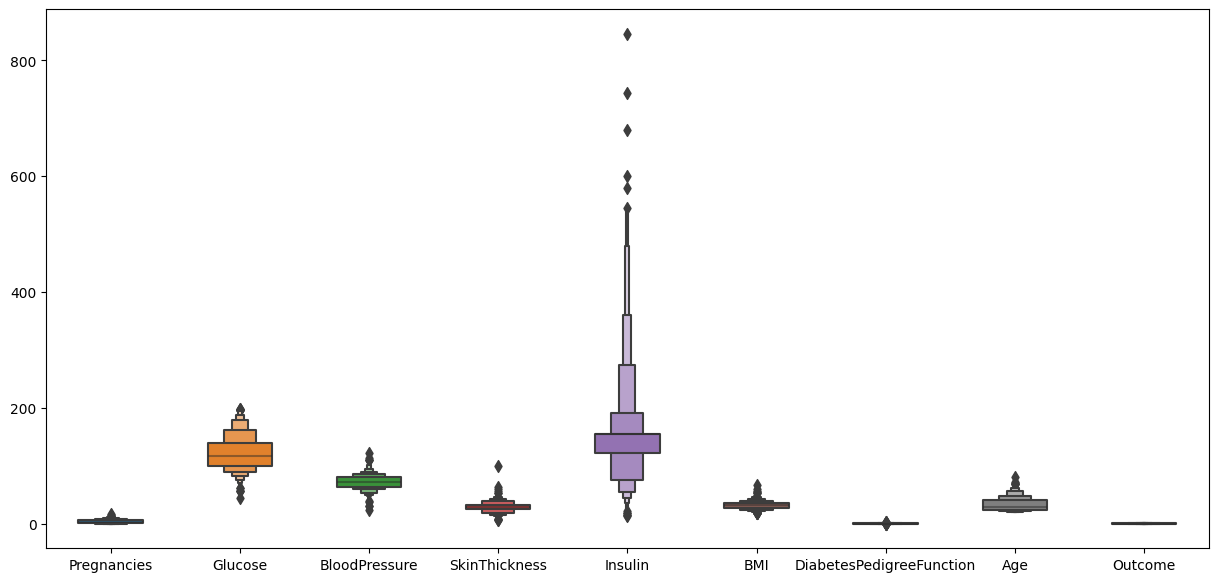

In [854]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxenplot(data=df,width=0.5,ax=ax)


In [855]:
# handling the outlyers

In [856]:
from scipy import stats 

In [857]:
z_score = stats.zscore(df['Insulin'])


In [858]:
df['insule_zscore']=z_score

In [859]:
df.drop(df[(df['insule_zscore']<=-3) | (df['insule_zscore']>3)].index,inplace=True)

<AxesSubplot: >

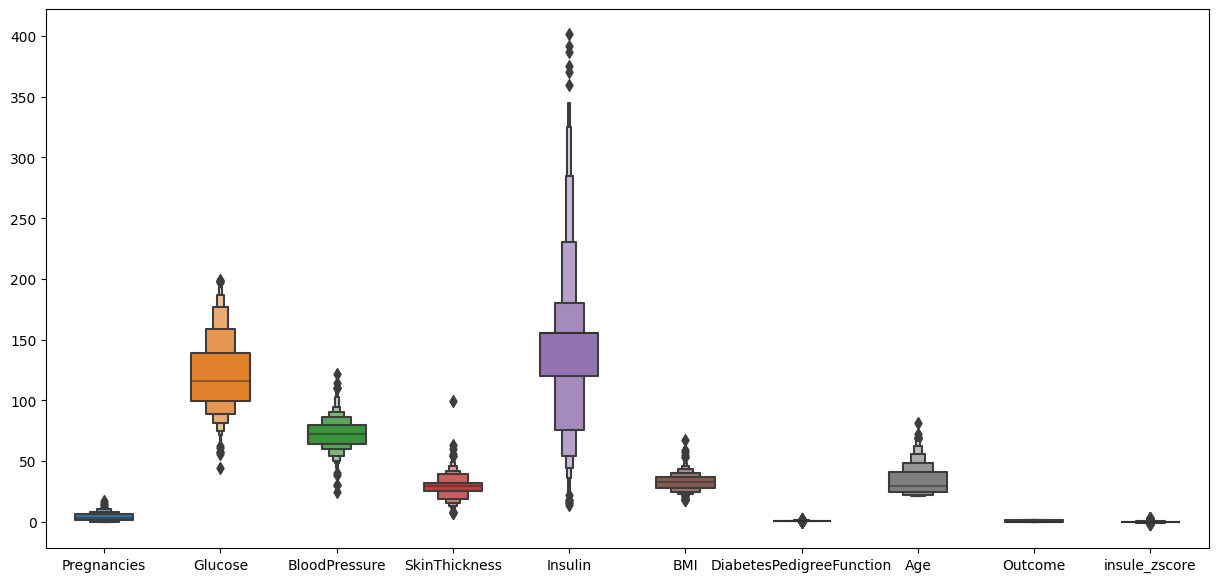

In [860]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxenplot(data=df,width=0.5,ax=ax)

In [861]:
df.drop('insule_zscore',axis=1,inplace=True)

<AxesSubplot: >

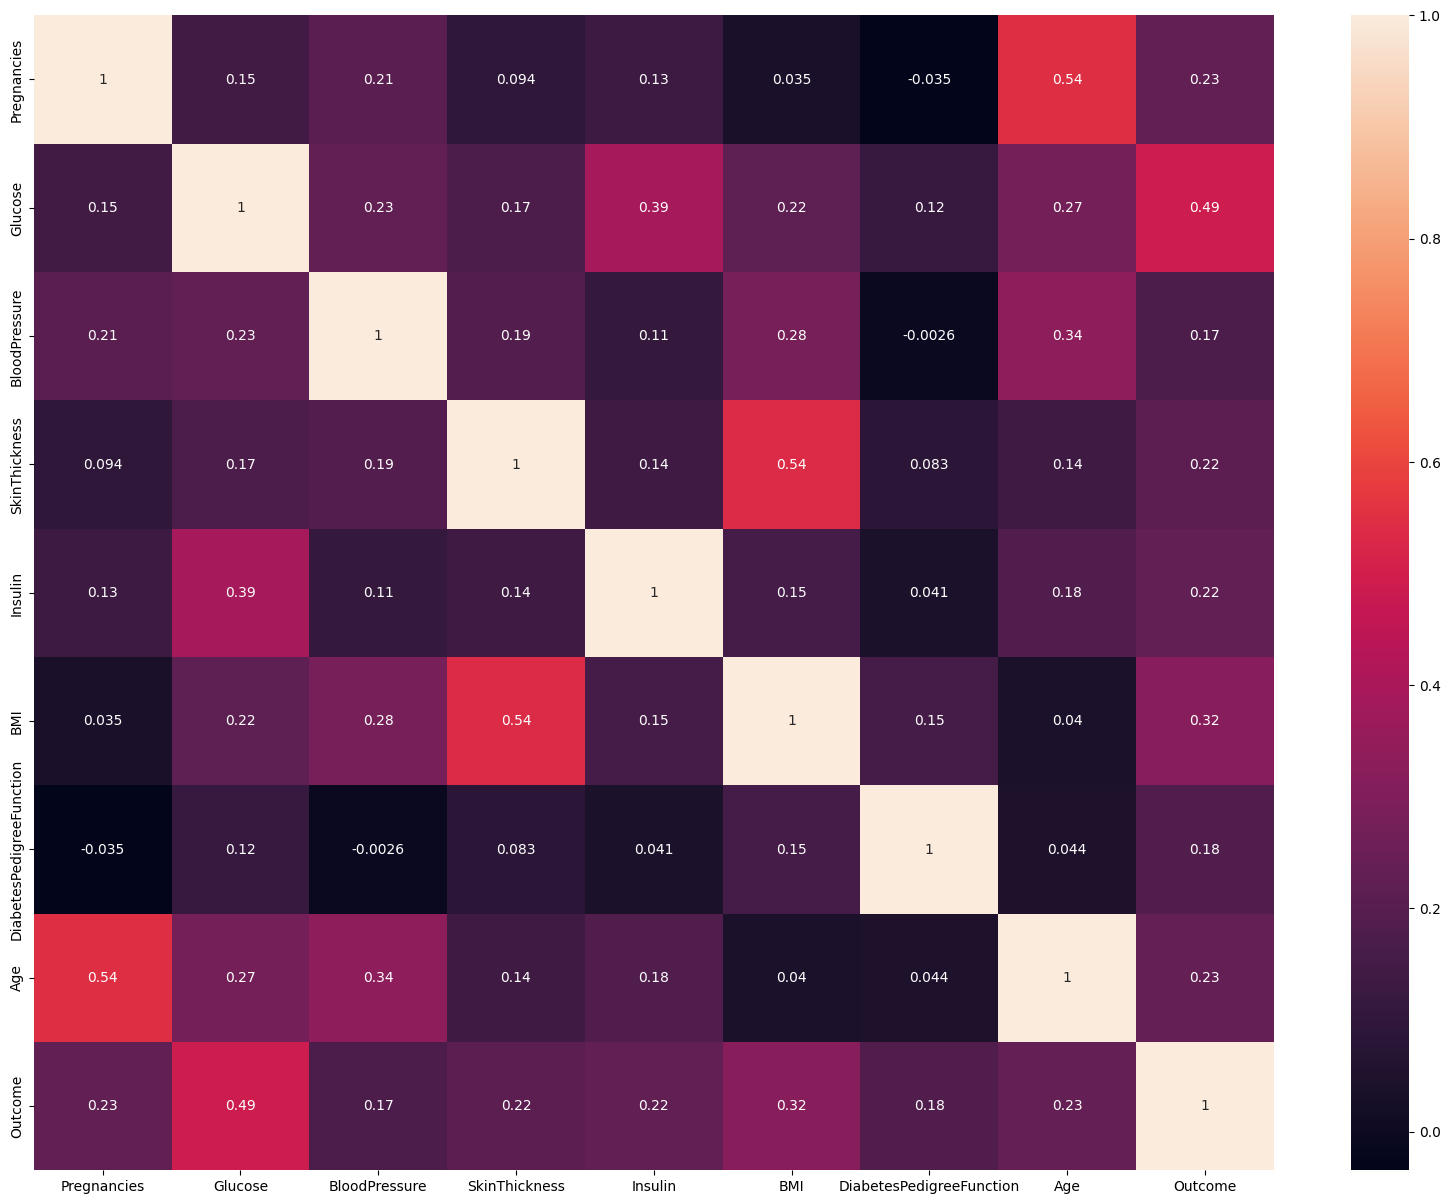

In [891]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [863]:
 df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.548223,26.6,0.351,31,0


In [864]:
#here we will apply logistic Regression 

In [865]:
# Data spliting 

In [866]:
X=df.drop(columns=['Outcome'])

In [867]:
y=df['Outcome']

In [868]:
from sklearn.model_selection import train_test_split

In [869]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=3)

In [870]:
y_train

723    0
520    0
452    0
69     0
66     1
      ..
676    1
264    1
660    0
257    0
681    1
Name: Outcome, Length: 524, dtype: int64

In [871]:
# Model Training

In [872]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [873]:
scaler = StandardScaler()
classifier = LogisticRegression()

In [874]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [875]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [876]:
y_pred=classifier.predict(X_test)

In [885]:
# HYPERTUNING

In [877]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [878]:
parameters={'penalty':('l1','l2','elasticnet',None),'C':np.logspace(-3,3,7),'solver':('lbfgs', 'liblinear', 'newton-cg','newton-cholesky', 'sag','saga')}


In [879]:
clf=GridSearchCV(estimator=classifier,param_grid=parameters,cv=10)


In [881]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')})

In [882]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [883]:
clf.best_score_

0.7727866473149492

In [884]:
clf_pred=clf.predict(X_test)

In [ ]:
classifier=LogisticRegression()

In [886]:
#PERFORMANCE MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)


In [ ]:
accuracy_score(y_test,clf_pred)


In [ ]:
print(classification_report(y_test,y_pred))

In [887]:
import pickle

In [892]:
pickle.dump(classifier,open('regressor.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))